In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv

# Study data files
russia_alcohol = "Data/russia_alcohol.csv"
gdp_data = "Data/gdp.csv"
unemployment_data = "Data/russia-unemployment copy.csv"
russia_geo = "Data/russian_geo.csv"

# Read CSV
alc_df = pd.read_csv(russia_alcohol)
unemp_df = pd.read_csv(unemployment_data)
gdp_df_read = pd.read_csv(gdp_data)
geo_df = pd.read_csv(russia_geo)
geo_df.head()

# API Response
from api_key import geoapify_key


In [28]:
# cleaning data
# renaming column and averaging months into year
# Study data files
clean_unemp = unemp_df.dropna(axis=1)
clean_unemp.columns=["Year","Unemployment Rate (%)"]
clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')
clean_unemp=clean_unemp[clean_unemp["Year"].astype(int)<=2016]
clean_unemp=clean_unemp[clean_unemp["Year"].astype(int)>=1998]

# change null values to 0
clean_alc = alc_df.dropna()
# add in a total per region
clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]
alc_year = clean_alc.groupby(clean_alc["year"]).sum()

#clean gdp data
gdp_df=gdp_df_read.dropna()
gdp_df.columns=["Date","GDP (in billions)"]
gdp_df["GDP (in billions)"]= gdp_df["GDP (in billions)"]/1000000000
gdp_df['Date']= pd.to_datetime(gdp_df['Date']).dt.strftime('%Y')
clean_unemp.head(40)

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/2792644786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_unemp['Year']= pd.to_datetime(clean_unemp['Year']).dt.strftime('%Y')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/2792644786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_alc["Total"] = clean_alc["wine"] + clean_alc["beer"] + clean_alc["vodka"] + clean_alc["champagne"] + clean_alc["brandy"]


,Year,Unemployment Rate (%)
7,1998,13.26
8,1999,13.04
9,2000,10.58
10,2001,8.98
11,2002,7.88
12,2003,8.21
13,2004,7.76
14,2005,7.12
15,2006,7.06
16,2007,6.00


In [29]:
#testing forloop for other code
unrate = []
years = ["2007", "2007", "2009", "2010"]
      
for y in years:
    for i in range(len(clean_unemp)):
        rate = clean_unemp.iloc[i,1]
        year = clean_unemp.iloc[i,0]
        if year == y:
            unrate.append(rate)
        
unrate

[6.0, 6.0, 8.3, 7.37]

<BarContainer object of 5 artists>

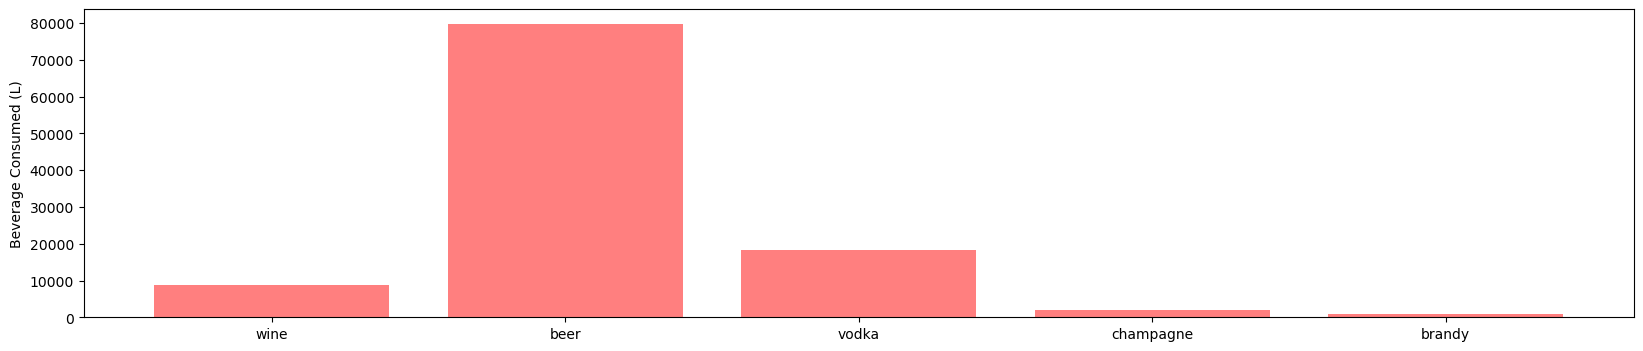

In [30]:
# What type of alcohol type is consumed most in Russia.
# plot a bar graph over the entirety of our data with total amount consumed/

tot_wine = clean_alc["wine"].sum()
tot_beer = clean_alc["beer"].sum()
tot_vodka = clean_alc["vodka"].sum()
tot_champ = clean_alc["champagne"].sum()
tot_brandy = clean_alc["brandy"].sum()

tot_alc_dict = {"Total Wine": [tot_wine], "Total Beer": [tot_beer], "Total Vodka": [tot_vodka], "Total Champagne": [tot_champ], "Total Brandy": [tot_brandy]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,4))
plt.ylabel("Beverage Consumed (L)")
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")

<BarContainer object of 5 artists>

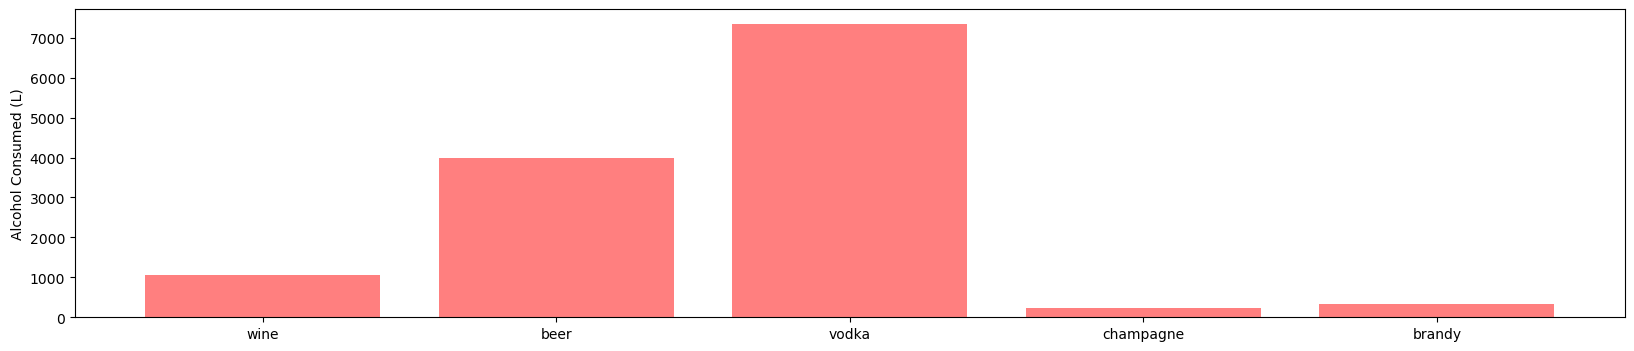

In [31]:
# plot a bar graph over the entirety of our data with total amount consumed by PERCENTAGE
# Used average alcohol percentage of each type of alcohol

tot_wine_ave = clean_alc["wine"].sum()*.12
tot_beer_ave = clean_alc["beer"].sum()*.05
tot_vodka_ave = clean_alc["vodka"].sum()*.40
tot_champ_ave = clean_alc["champagne"].sum()*.12
tot_brandy_ave = clean_alc["brandy"].sum()*.40

tot_alc_dict = {"Total Wine": [tot_wine_ave], "Total Beer": [tot_beer_ave], "Total Vodka": [tot_vodka_ave], "Total Champagne": [tot_champ_ave], "Total Brandy": [tot_brandy_ave]}
tot_alc_df = pd.DataFrame(data=tot_alc_dict)
#tot_alc_df.T

alc_list = ["wine", "beer", "vodka", "champagne", "brandy"]
plt.figure(figsize=(20,4))
plt.ylabel("Alcohol Consumed (L)")
plt.bar(alc_list, tot_alc_df.iloc[0,:], color='r', alpha=0.5, align="center")

In [32]:

#  Does alcohol type consumed vary by region
#  Needs API to create a map

<Figure size 640x480 with 0 Axes>

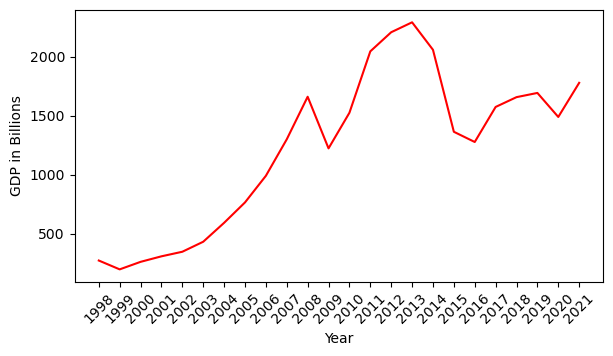

In [33]:
# Graphing GDP
fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(gdp_df["Date"], gdp_df["GDP (in billions)"], "r")
plt.xticks(rotation = 45)
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.show()

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/468511696.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/468511696.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/468511696.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')


<Figure size 640x480 with 0 Axes>

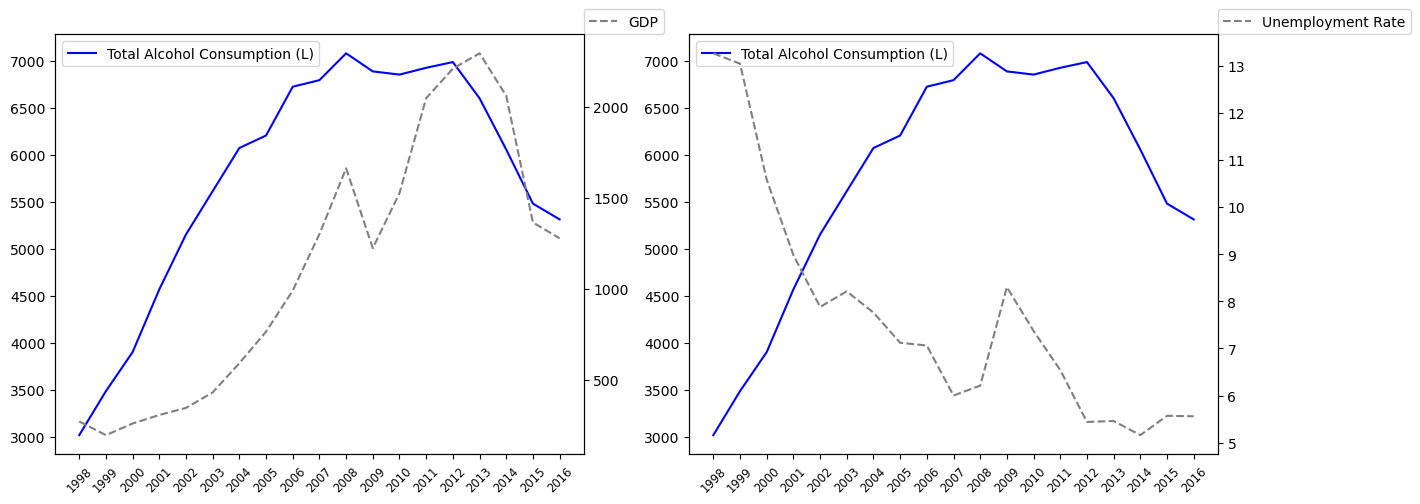

In [39]:
# How does alcohol consumption change with economic/unemployment conditions
gdp_clean_df=gdp_df[gdp_df["Date"].astype(int)<=2016]

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
x_axis=list(map(str,alc_year.index))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.plot(x_axis, alc_year["Total"], "b", label="Total Alcohol Consumption (L)")
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.legend(loc="upper left")
#ax1.ylabel("Total Alcohol Consumed (L)")
ax1 = ax1.twinx()
ax1.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
#ax1.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax1.legend(loc=(1.0, 1.0))

ax2.plot(x_axis, alc_year["Total"], "b", label="Total Alcohol Consumption (L)")
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc="upper left")
ax2 = ax2.twinx()
ax2.plot(x_axis, clean_unemp['Unemployment Rate (%)'], 'gray', linestyle='--', label="Unemployment Rate")
#ax2.fill_between(x_axis[0:], clean_unemp['Unemployment Rate (%)'][0:], alpha=0.5, color='ivory')
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc=(1.0, 1.0))

In [35]:
# Unemployment graph

clean_unemp.head()


,Year,Unemployment Rate (%)
7,1998,13.26
8,1999,13.04
9,2000,10.58
10,2001,8.98
11,2002,7.88


/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:46: UserWarning: FixedFormatter should only b

<Figure size 640x480 with 0 Axes>

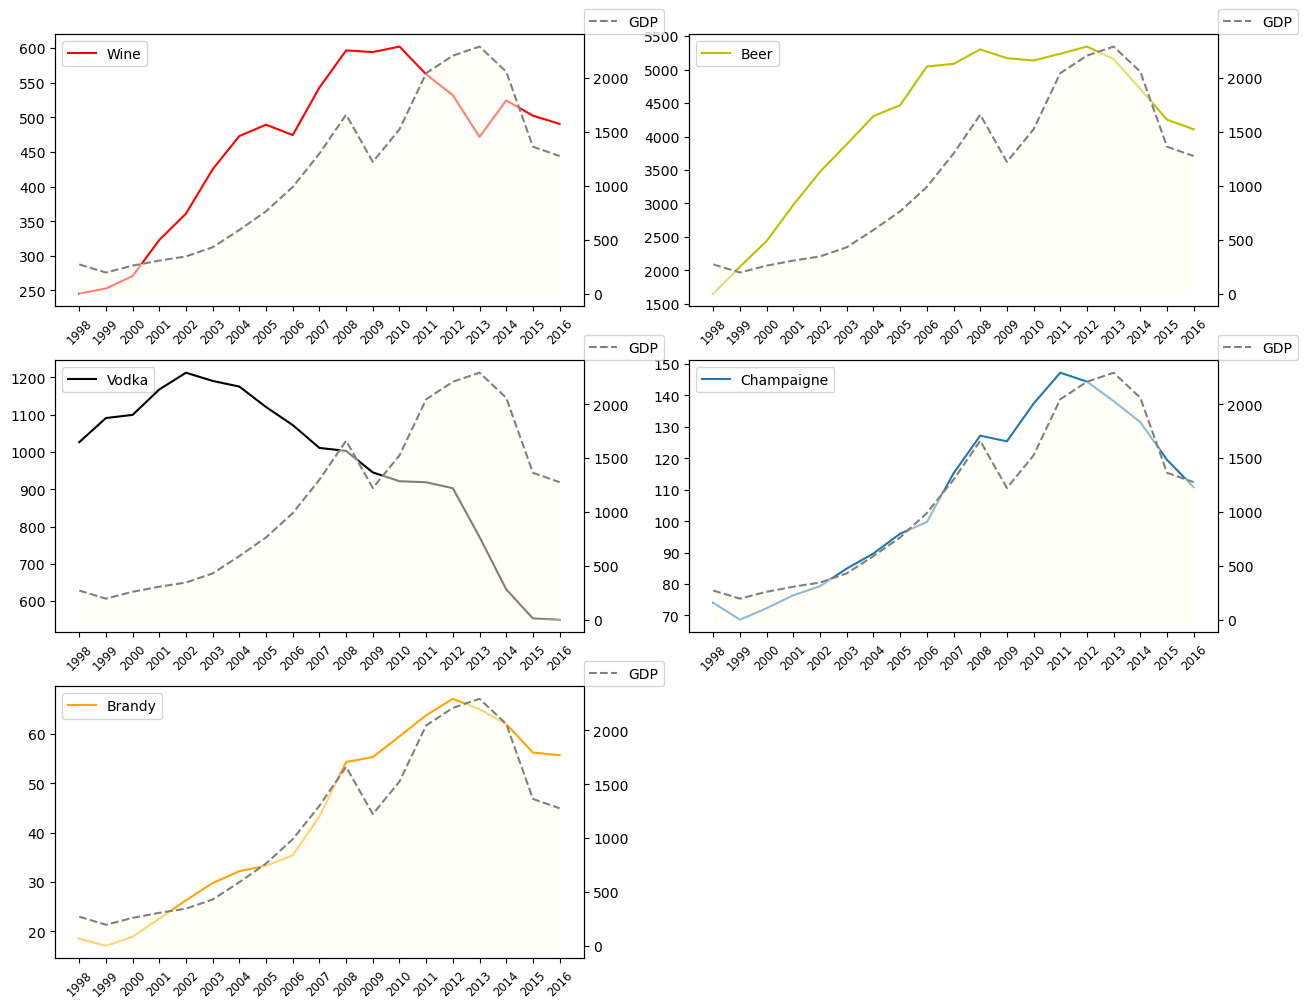

/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
/var/folders/89/wrvs6qkx5jzf1gpgxwy68q1h0000gp/T/ipykernel_64511/4089429509.py:77: UserWarning: FixedFormatter should only b

Text(0, 0.5, 'Brandy')

<Figure size 640x480 with 0 Axes>

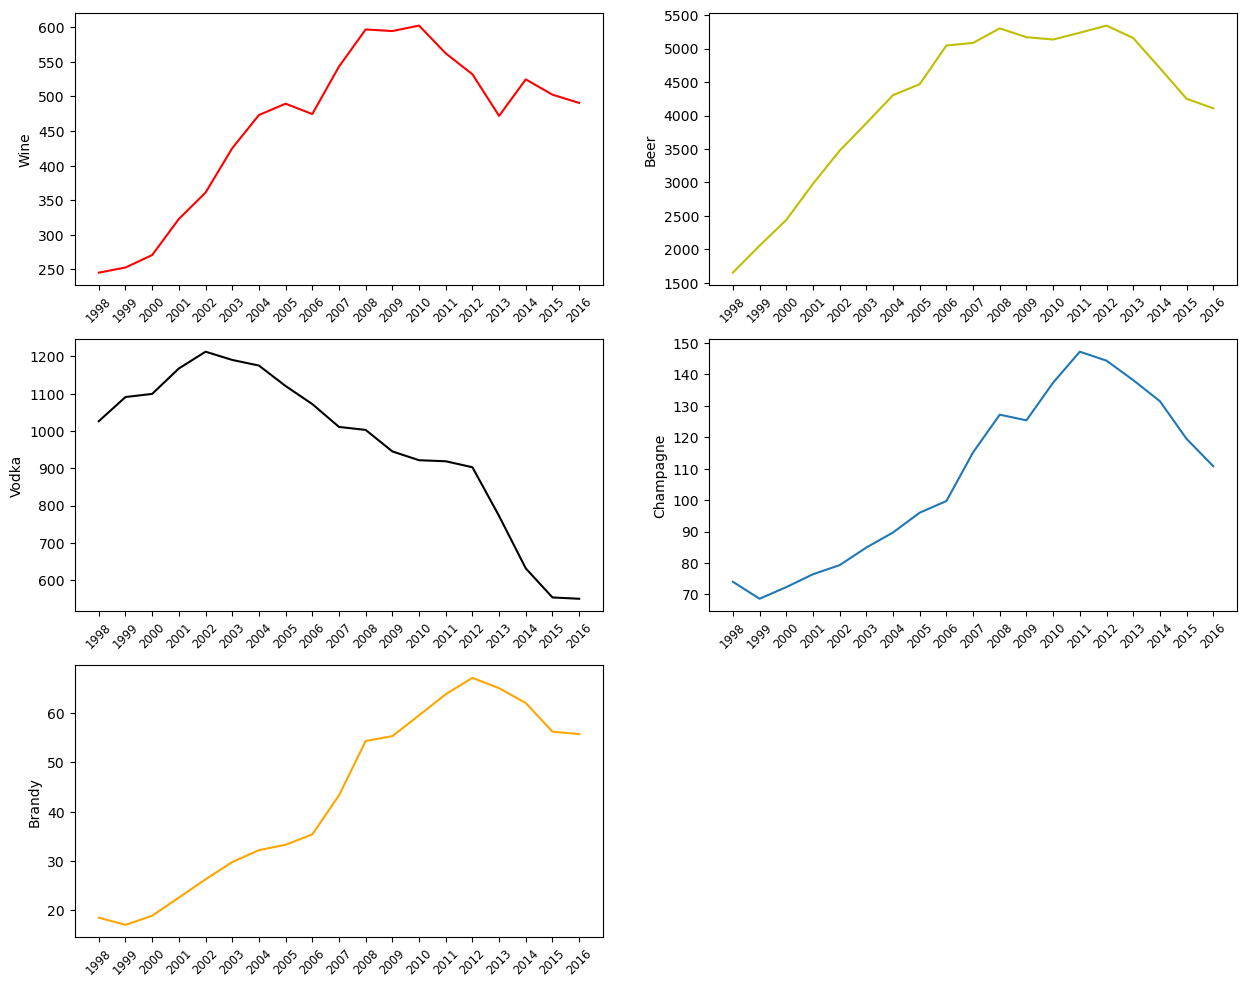

In [36]:
# How does Russia's alcohol consumption type change with economic/unemployment conditions
# Plotting alcohol by year

year_group=clean_alc.groupby(clean_alc["year"]).sum()
gdp_clean_df=gdp_df[gdp_df["Date"].astype(int)<=2016]

x_axis=list(map(str,year_group.index))

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r',label="Wine") #row 0, col 0 
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.legend(loc="upper left") #or upper right
ax1 = ax1.twinx()
ax1.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax1.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax1.legend(loc=(1.0, 1.0))
ax2.plot(x_axis, year_group['beer'],'y',label="Beer")
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.legend(loc="upper left")
ax2 = ax2.twinx()
ax2.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax2.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax2.legend(loc=(1.0, 1.0))
ax3.plot(x_axis, year_group['vodka'],'black',label="Vodka")
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.legend(loc="upper left")
ax3 = ax3.twinx()
ax3.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax3.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax3.legend(loc=(1.0, 1.0))
ax4.plot(x_axis, year_group['champagne'],label="Champaigne")
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.legend(loc="upper left")
ax4 = ax4.twinx()
ax4.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax4.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax4.legend(loc=(1.0, 1.0))
ax5.plot(x_axis, year_group['brandy'],'orange',label="Brandy")
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.legend(loc="upper left")
ax5 = ax5.twinx()
ax5.plot(x_axis, gdp_clean_df['GDP (in billions)'], 'gray', linestyle='--',label="GDP")
ax5.fill_between(x_axis[0:], gdp_clean_df['GDP (in billions)'][0:], alpha=0.5, color='ivory')
ax5.legend(loc=(1.0, 1.0))

plt.show();
 




fig = plt.figure()
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(x_axis, year_group['wine'], 'r') #row 0, col 0 )
ax2.plot(x_axis, year_group['beer'],'y')

ax3.plot(x_axis, year_group['vodka'],'black')
ax4.plot(x_axis, year_group['champagne'])
ax5.plot(x_axis, year_group['brandy'],'orange')
ax1.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax2.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax3.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax4.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax5.set_xticklabels(x_axis, rotation=45, fontsize='small')
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 
ax1.set_ylabel('Wine') 
ax2.set_ylabel('Beer') 
ax3.set_ylabel('Vodka') 
ax4.set_ylabel('Champagne') 
ax5.set_ylabel('Brandy') 

The correlation coefficient between wine and GDP is 0.77.
The correlation coefficient between beer and GDP is 0.81.
The correlation coefficient between vodka and GDP is -0.66.
The correlation coefficient between champagne and GDP is 0.97.
The correlation coefficient between brandy and GDP is 0.96.
The correlation coefficient between brandy and GDP is 0.74.


<Figure size 640x480 with 0 Axes>

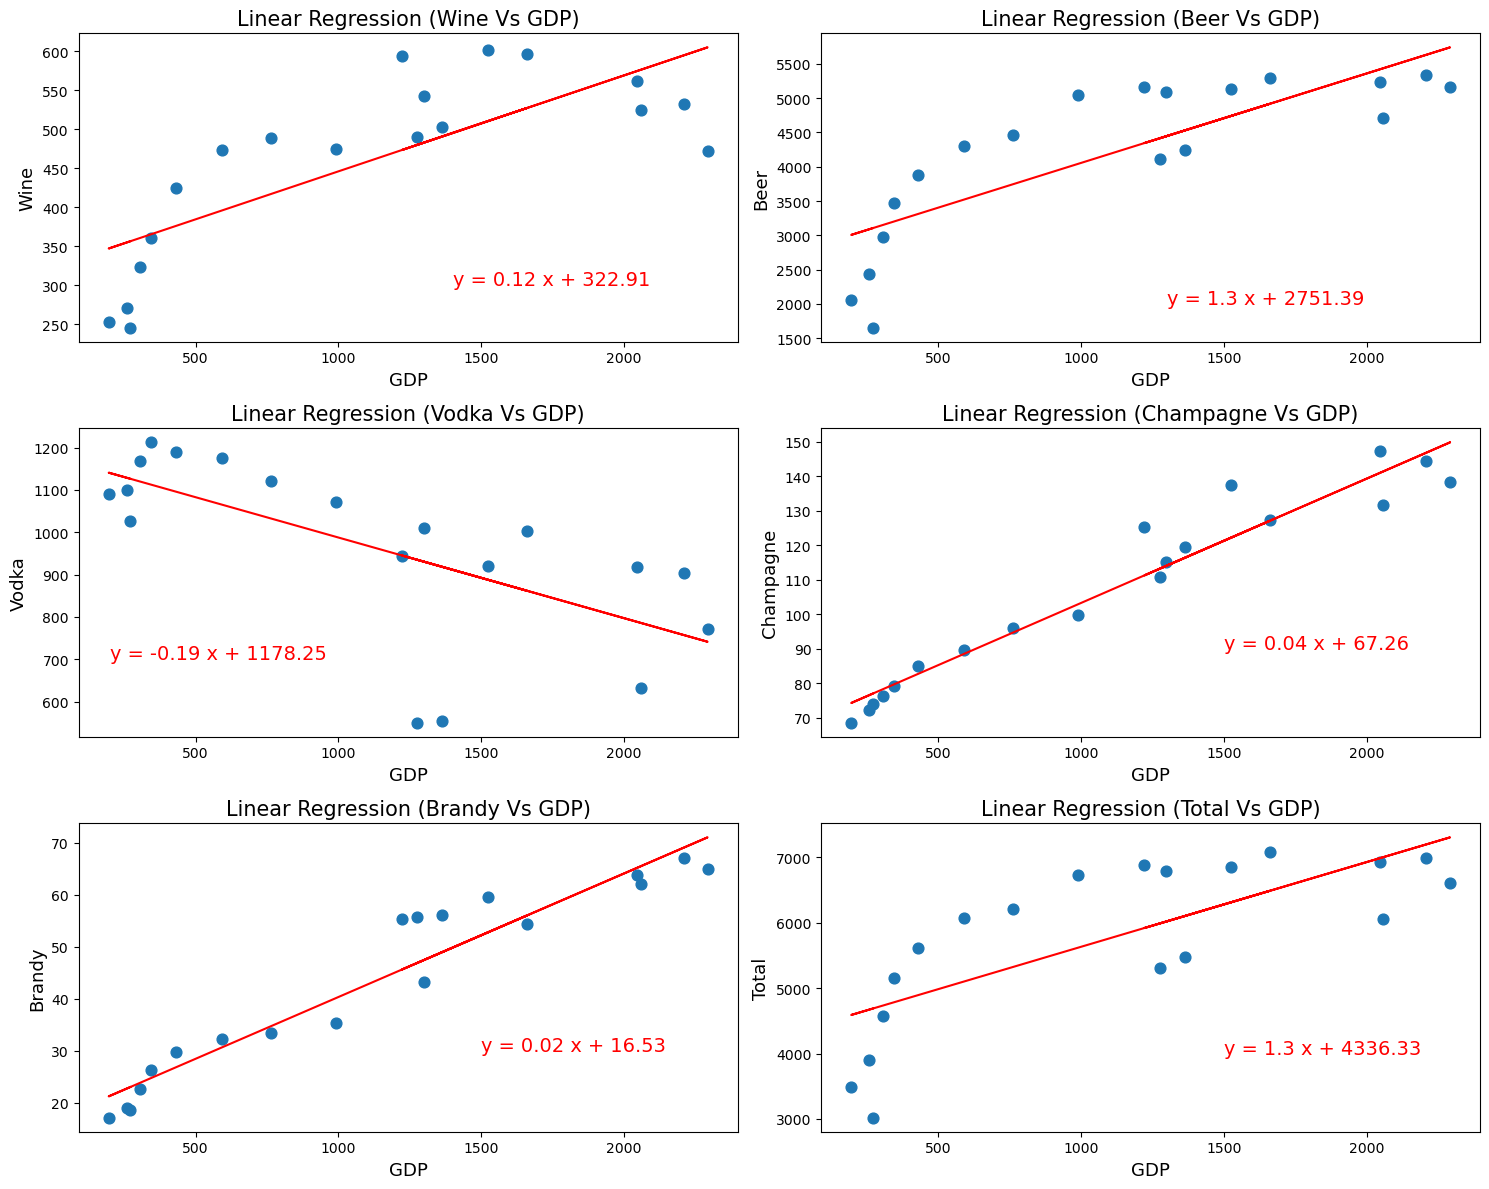

In [37]:
# Can we predict alcohol consumption based on unemployment rate in the future

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
x_value=gdp_clean_df['GDP (in billions)']
wine_value=year_group['wine']
beer_value=year_group['beer']
vodka_value=year_group['vodka']
champagne_value=year_group['champagne']
brandy_value=year_group['brandy']
total_value=year_group['Total']

correlation = round(st.pearsonr(x_value, wine_value)[0],2)
print(f"The correlation coefficient between wine and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, beer_value)[0],2)
print(f"The correlation coefficient between beer and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, vodka_value)[0],2)
print(f"The correlation coefficient between vodka and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, champagne_value)[0],2)
print(f"The correlation coefficient between champagne and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, brandy_value)[0],2)
print(f"The correlation coefficient between brandy and GDP is {correlation}.")
correlation = round(st.pearsonr(x_value, total_value)[0],2)
print(f"The correlation coefficient between brandy and GDP is {correlation}.")

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value, wine_value)
wine_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax1.scatter(x_value, wine_value, color="#1f77b4",s=60)
ax1.plot(x_value, wine_regress_values,color='red')
ax1.set_title("Linear Regression (Wine Vs GDP)", fontsize=15)
ax1.set_xlabel("GDP", fontsize =13)
ax1.set_ylabel("Wine", fontsize =13)
ax1.annotate(line_eq,(1400,300), fontsize=14, color="red")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  beer_value)
beer_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax2.scatter(x_value, beer_value, color="#1f77b4",s=60)
ax2.plot(x_value, beer_regress_values,color='red')
ax2.set_title("Linear Regression (Beer Vs GDP)", fontsize=15)
ax2.set_xlabel("GDP", fontsize =13)
ax2.set_ylabel("Beer", fontsize =13)
ax2.annotate(line_eq,(1300,2000), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  vodka_value)
vodka_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax3.scatter(x_value, vodka_value, color="#1f77b4",s=60)
ax3.plot(x_value, vodka_regress_values,color='red')
ax3.set_title("Linear Regression (Vodka Vs GDP)", fontsize=15)
ax3.set_xlabel("GDP", fontsize =13)
ax3.set_ylabel("Vodka", fontsize =13)
ax3.annotate(line_eq,(200,700), fontsize=14, color="red")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  champagne_value)
champagne_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax4.scatter(x_value, champagne_value, color="#1f77b4",s=60)
ax4.plot(x_value, champagne_regress_values,color='red')
ax4.set_title("Linear Regression (Champagne Vs GDP)", fontsize=15)
ax4.set_xlabel("GDP", fontsize =13)
ax4.set_ylabel("Champagne", fontsize =13)
ax4.annotate(line_eq,(1500,90), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value,  brandy_value)
brandy_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax5.scatter(x_value, brandy_value, color="#1f77b4",s=60)
ax5.plot(x_value, brandy_regress_values,color='red')
ax5.set_title("Linear Regression (Brandy Vs GDP)", fontsize=15)
ax5.set_xlabel("GDP", fontsize =13)
ax5.set_ylabel("Brandy", fontsize =13)
ax5.annotate(line_eq,(1500,30), fontsize=14, color="red")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value, total_value)
total_regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  
ax6.scatter(x_value, total_value, color="#1f77b4",s=60)
ax6.plot(x_value, total_regress_values,color='red')
ax6.set_title("Linear Regression (Total Vs GDP)", fontsize=15)
ax6.set_xlabel("GDP", fontsize =13)
ax6.set_ylabel("Total", fontsize =13)
ax6.annotate(line_eq,(1500,4000), fontsize=14, color="red")

fig=plt.tight_layout()

In [28]:
alc_df
largest_wine=alc_df[alc_df["year"]==2016].nlargest(3,"wine")
largest_beer=alc_df[alc_df["year"]==2016].nlargest(3,"beer")
largest_vodka=alc_df[alc_df["year"]==2016].nlargest(3,"vodka")
largest_champagne=alc_df[alc_df["year"]==2016].nlargest(3,"champagne")
largest_brandy=alc_df[alc_df["year"]==2016].nlargest(3,"brandy")
print(largest_brandy)

      year            region  wine  beer  vodka  champagne  brandy
1571  2016   Murmansk Oblast   8.1  47.6   12.2        2.5     1.9
1553  2016    Kamchatka Krai   6.6  85.4   10.4        3.3     1.3
1564  2016  Leningrad Oblast   8.1  41.0    8.4        1.6     1.3


In [ ]:
# Does alcohol consumption per capita change depending on the latitude of the region?

In [4]:
# Create new DF with population column

pop_df = geo_df.copy()
pop_df["Population"] = ""
pop_df

,region,lat,lon,Population
0,Republic of Adygea,44.693901,40.152042,
1,Komi Republic,63.988142,54.332607,
2,Sverdlovsk Oblast,58.641475,61.802155,
3,Sakhalin Oblast,49.721967,143.448533,
4,Saratov Oblast,51.652056,46.863195,
...,...,...,...,...
80,Kirov Oblast,57.966559,49.407460,
81,Kemerovo Oblast,54.235332,85.378501,
82,Republic of Karelia,62.619403,33.492027,
83,Karachay-Cherkess Republic,43.736833,41.726799,


In [5]:
# Set parameters to search for population

params = {
    "features": f"details.population",
    "apiKey":geoapify_key
}

# Print a message to follow up the population search
print("Starting population search")

# Iterate through the pop_df DataFrame
for index, row in pop_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = pop_df.loc[index, "lat"]
    longitude = pop_df.loc[index, "lon"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["lat"] = f"{latitude}"
    params["lon"] = f"{longitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/place-details?"

    # Make and API request using the params dictionary
    pop_req = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    pop_req = pop_req.json()
    
    # Grab the population from the results and store the name in the pop_df DataFrame
    try:
        pop_df.loc[index, "Population"] = pop_req["features"][0]["properties"]["population"]["actual"]
    except (KeyError, IndexError):
        # If no population is found, set the population as "NaN", so you can later remove from data for analysis.
        pop_df.loc[index, "Population"] = np.nan
        
    # Log the search results
    print(f"{pop_df.loc[index, 'region']} - population: {pop_df.loc[index, 'Population']}")

# Display sample data
pop_df

Starting population search
Republic of Adygea - population: 463167
Komi Republic - population: 813590
Sverdlovsk Oblast - population: 4290067
Sakhalin Oblast - population: 485621
Saratov Oblast - population: 2395111
Saint Petersburg - population: 5384342
Samara Oblast - population: 3154164
Ryazan Oblast - population: nan
Rostov Oblast - population: 4181486
Tuva Republic - population: 330368
Altai Republic - population: 220934
Nizhny Novgorod Oblast - population: 3176552
Pskov Oblast - population: 620249
Primorsky Krai - population: 1877844
Perm Krai - population: 2579261
Penza Oblast - population: 1290898
Oryol Oblast - population: 724686
Orenburg Oblast - population: 1942917
Omsk Oblast - population: 1903675
Novosibirsk Oblast - population: 2785836
Sevastopol - population: 522057
Republic of North Ossetia-Alania - population: 693098
Smolensk Oblast - population: 921127
Stavropol Krai - population: 2792796
Yamalo-Nenets Autonomous Okrug - population: 547010
Sakha (Yakutia) Republic - p

,region,lat,lon,Population
0,Republic of Adygea,44.693901,40.152042,463167
1,Komi Republic,63.988142,54.332607,813590
2,Sverdlovsk Oblast,58.641475,61.802155,4290067
3,Sakhalin Oblast,49.721967,143.448533,485621
4,Saratov Oblast,51.652056,46.863195,2395111
...,...,...,...,...
80,Kirov Oblast,57.966559,49.407460,1250173
81,Kemerovo Oblast,54.235332,85.378501,NaN
82,Republic of Karelia,62.619403,33.492027,609071
83,Karachay-Cherkess Republic,43.736833,41.726799,465357


In [7]:
# Determine sum of alcohol consumed in each region
alc_region = clean_alc.groupby(clean_alc["region"]).sum()
alc_region_clean = alc_region.drop(['year'], axis=1)

#merge with pop_df

alc_pop_df = pd.merge(alc_region_clean, pop_df,on='region',how = 'left')
alc_pop_df

,region,wine,beer,vodka,champagne,brandy,Total,lat,lon,Population
0,Altai Krai,60.31,919.09,179.85,22.94,4.50,1186.69,52.693224,82.693142,2296353
1,Altai Republic,98.61,697.76,183.99,17.76,4.82,1002.94,50.711410,86.857219,220934
2,Amur Oblast,99.21,1014.17,270.12,21.20,7.54,1412.24,52.803237,128.437295,781846
3,Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54,1436.20,63.558969,43.122165,1127051
4,Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86,1324.00,47.187819,47.608851,997778
...,...,...,...,...,...,...,...,...,...,...
79,Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44,60.039146,43.121521,1160445
80,Voronezh Oblast,88.12,1043.31,188.41,28.50,7.64,1355.98,50.980039,40.150651,2305608
81,Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63,67.147163,74.341549,547010
82,Yaroslavl Oblast,136.67,1203.30,283.94,23.58,10.85,1658.34,57.778198,39.002110,1241424


In [8]:
# remove na's
alc_pop_df.dropna(how='any', inplace= True)

# create alchol consumption per capita column and calculate 
alc_pop_df = alc_pop_df.astype({"Population":'int'})
alc_pop_df["Alcohol Consumption per Capita"] = (alc_pop_df["Total"]/alc_pop_df["Population"])*100
alc_pop_df

,region,wine,beer,vodka,champagne,brandy,Total,lat,lon,Population,Alcohol Consumption per Capita
0,Altai Krai,60.31,919.09,179.85,22.94,4.50,1186.69,52.693224,82.693142,2296353,0.051677
1,Altai Republic,98.61,697.76,183.99,17.76,4.82,1002.94,50.711410,86.857219,220934,0.453955
2,Amur Oblast,99.21,1014.17,270.12,21.20,7.54,1412.24,52.803237,128.437295,781846,0.180629
3,Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54,1436.20,63.558969,43.122165,1127051,0.127430
4,Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86,1324.00,47.187819,47.608851,997778,0.132695
...,...,...,...,...,...,...,...,...,...,...,...
79,Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44,60.039146,43.121521,1160445,0.155754
80,Voronezh Oblast,88.12,1043.31,188.41,28.50,7.64,1355.98,50.980039,40.150651,2305608,0.058812
81,Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63,67.147163,74.341549,547010,0.357695
82,Yaroslavl Oblast,136.67,1203.30,283.94,23.58,10.85,1658.34,57.778198,39.002110,1241424,0.133584


In [14]:
map_plot_1 = alc_pop_df.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 800,
    frame_height = 400,
    color = "region",
    size = "Alcohol Consumption per Capita",
    scale = 15
    )
map_plot_1

/Users/Mason/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Mason/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Mason/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/Mason/opt/anaconda3/lib/python3.9/site-packages/cartop

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]   (region,Alcohol Consumption per Capita)